# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hri_tools import HumorDataset, MetaHumorDataset, MetaHumorDatasetCreator
from hri_tools import SUPPORTED_DATASETS, HRI_PAPER_2023_DATASETS
from hri_tools import download
from hri_tools import calc_divergence
from hri_tools import calc_divergence_between_target
from hri_tools import calc_vocab_for_labels
from hri_tools import get_bad_words

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from better_profanity import profanity
from tqdm import tqdm

In [4]:
tqdm.pandas()

In [5]:
import copy

# Download datasets

In [6]:
%env HRI_URL=###PASTE HERE###
%env HRI_PASSWORD=###PASTE HERE###

env: HRI_URL=###PASTE HERE###
env: HRI_PASSWORD=###PASTE HERE###


In [7]:
# download()

# Load datasets and get statistics

In [8]:
print(SUPPORTED_DATASETS)

['funlines_and_human_microedit_paper_2023', 'funlines_v1', 'funlines_v2', 'human_microedit_v1', 'human_microedit_v2', 'meta_dataset', 'one_liners', 'onion_or_not', 'pun_of_the_day', 'reddit_jokes_last_laught', 'semeval_2017_task_7', 'semeval_2021_task_7', 'unfun_me', 'short_jokes', 'the_naughtyformer']


In [9]:
print(HRI_PAPER_2023_DATASETS)

['funlines_and_human_microedit_paper_2023', 'one_liners', 'onion_or_not', 'pun_of_the_day', 'reddit_jokes_last_laught', 'semeval_2017_task_7', 'semeval_2021_task_7', 'unfun_me', 'short_jokes', 'the_naughtyformer']


### Example of meta dataset

In [8]:
mdf = MetaHumorDatasetCreator(
    params=[
        {
            "name":"pun_of_the_day",
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        },
        {
            "name":"semeval_2021_task_7",
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        },
        {
            "name":"unfun_me",
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        },
        {
            "name":"short_jokes",
            "drop_which_dup": True,
            "sample_from_train": 10_000,
            "sample_from_test": 5_000,
            "sample_from_valid": 5_000
        },
        {
            "name":"onion_or_not",
            "allowed_labels": [1],
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        }
    ]
)

### Load data

In [9]:
all_data = list()
for name in HRI_PAPER_2023_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

In [10]:
all_data.append(
    mdf.create_dataset()
)

In [12]:
for i in range(len(all_data)):
    all_data[i].calc_statistics()

for i in range(len(all_data)):
    all_data[i].print_statistics_report()


        Statistics report for funlines_and_human_microedit_paper_2023 dataset:
        Number of samples: 23597, pos - 13432, neg - 10165.

        Stats for train/test/valid:
        Number of samples train: 16518, pos - 9447, neg - 7071.
        Number of samples test: 4719, pos - 2672, neg - 2047.
        Number of samples valid: 2360, pos - 1313, neg - 1047.

        Mean word length is 12.554858668474806, pos - 12.540500297796306, neg - 12.573831775700935
        Mean length by symbols is 71.7370852226978 (without space is 59.79154129762258)
        

        Statistics report for one_liners dataset:
        Number of samples: 31696, pos - 15979, neg - 15717.

        Stats for train/test/valid:
        Number of samples train: 22188, pos - 11249, neg - 10939.
        Number of samples test: 6338, pos - 3174, neg - 3164.
        Number of samples valid: 3170, pos - 1556, neg - 1614.

        Mean word length is 12.575719333669864, pos - 14.770386131797984, neg - 10.34446777374817

# Working with vocab

In [13]:
for i in range(len(all_data)):
    all_data[i].run_preprocessing()

for i in range(len(all_data)):
    all_data[i].build_vocab()

In [14]:
print(calc_divergence(all_data[0], all_data[1]))

{'Symmetrised KL divergence': 3.700232266023921, 'Jensen–Shannon divergence': None}


In [15]:
print(calc_divergence(all_data[1], all_data[0]))

{'Symmetrised KL divergence': 3.700232266023921, 'Jensen–Shannon divergence': None}


In [16]:
symmetrised_kl_divergence = list()
jensen_shannon_divergence = list()

for i in range(len(all_data)):
    for j in range(len(all_data)):
        result = calc_divergence(all_data[i], all_data[j])
        symmetrised_kl_divergence.append(
            (all_data[i].name, all_data[j].name, result['Symmetrised KL divergence'])
        )

        jensen_shannon_divergence.append(
            (all_data[i].name, all_data[j].name, result['Jensen–Shannon divergence'])
        )

In [17]:
df_stat = pd.DataFrame(symmetrised_kl_divergence, columns =['Dataset_x', 'Dataset_y', 'Score'])
df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')
df_stat_pivot_symmetrised_kl = df_stat_pivot_symmetrised_kl.reindex(sorted(df_stat_pivot_symmetrised_kl.columns), axis=1)

/tmp/ipykernel_663/2044256463.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')


In [18]:
df_stat_pivot_symmetrised_kl

Dataset_y,funlines_and_human_microedit_paper_2023,meta_dataset,one_liners,onion_or_not,pun_of_the_day,reddit_jokes_last_laught,semeval_2017_task_7,semeval_2021_task_7,short_jokes,the_naughtyformer,unfun_me
Dataset_x,,,,,,,,,,,
funlines_and_human_microedit_paper_2023,0.000000,2.430102,3.700232,1.989827,3.778101,4.455740,3.962262,3.923903,3.166345,2.479291,3.742770
meta_dataset,2.430102,0.000000,1.046076,1.181167,1.466786,1.597652,1.960156,0.866143,0.372990,1.023232,3.456079
one_liners,3.700232,1.046076,0.000000,2.003582,1.394661,1.597997,1.658846,1.098419,1.562093,1.966182,3.922052
onion_or_not,1.989827,1.181167,2.003582,0.000000,2.502629,2.495226,2.674551,1.893414,1.940417,2.104130,2.463378
pun_of_the_day,3.778101,1.466786,1.394661,2.502629,0.000000,1.817708,0.846162,1.488950,3.111134,2.778851,4.181797
reddit_jokes_last_laught,4.455740,1.597652,1.597997,2.495226,1.817708,0.000000,2.250573,1.170517,1.918120,2.615799,5.078986
semeval_2017_task_7,3.962262,1.960156,1.658846,2.674551,0.846162,2.250573,0.000000,1.797791,3.786069,3.298582,4.060398
semeval_2021_task_7,3.923903,0.866143,1.098419,1.893414,1.488950,1.170517,1.797791,0.000000,1.823464,2.145820,3.977797
short_jokes,3.166345,0.372990,1.562093,1.940417,3.111134,1.918120,3.786069,1.823464,0.000000,0.831323,5.950971


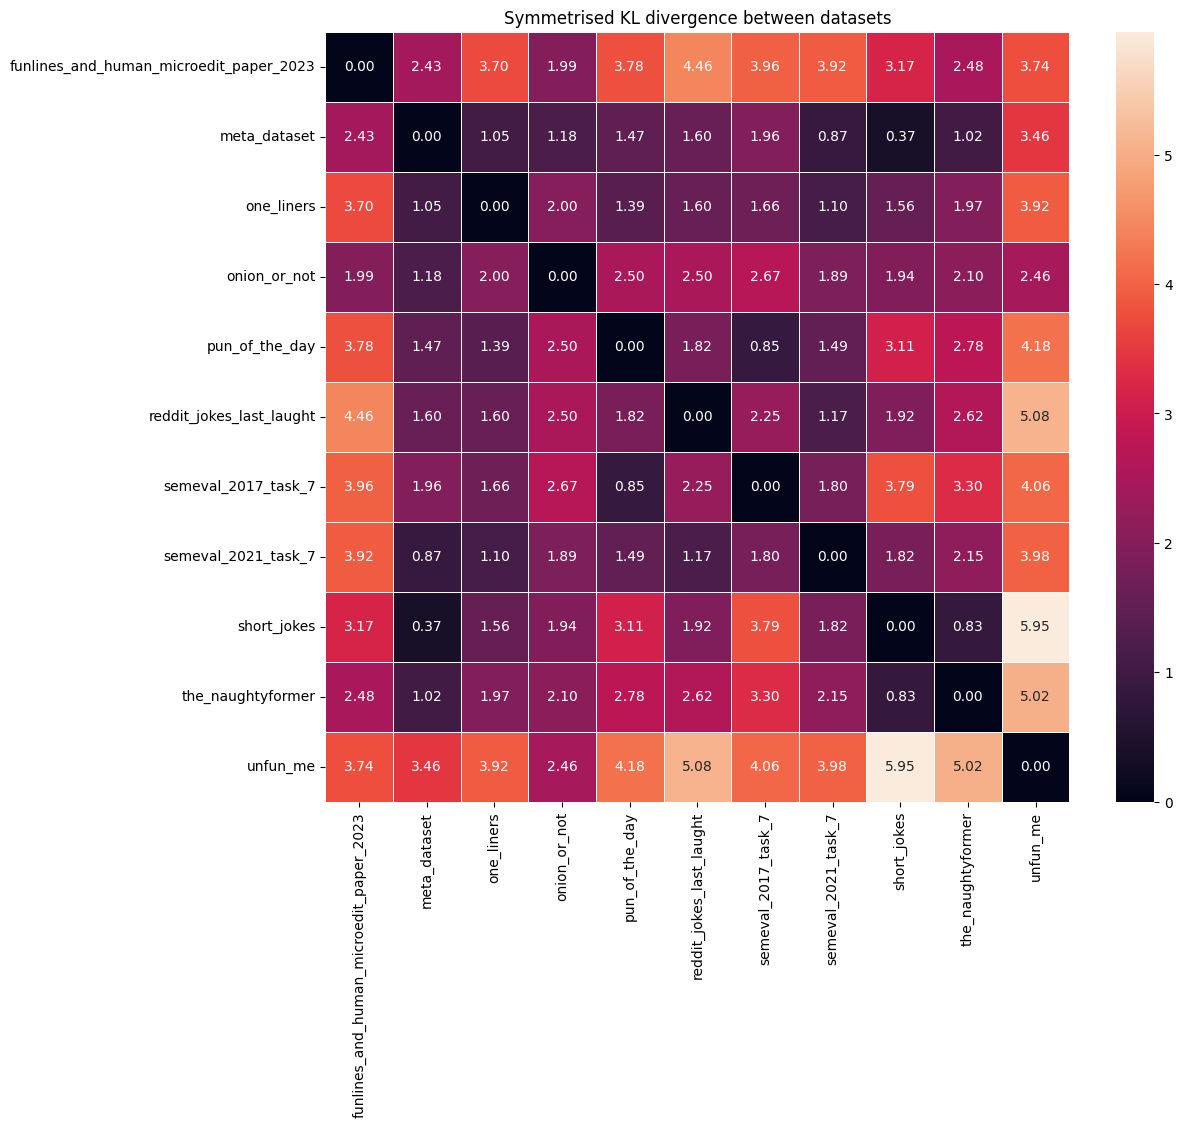

In [19]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_stat_pivot_symmetrised_kl, annot=True, fmt=".2f", ax=ax, linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.title('Symmetrised KL divergence between datasets')
plt.savefig('Symmetrised KL divergence between datasets.png')

# Show vocab size

In [20]:
for i in range(len(all_data)):
    print(f'{all_data[i].name} | vocab_size:{all_data[i].vocab_size} | non unique words: {all_data[i].non_unique_words}')

funlines_and_human_microedit_paper_2023 | vocab_size:16128 | non unique words: 266484
one_liners | vocab_size:27898 | non unique words: 335418
onion_or_not | vocab_size:27253 | non unique words: 297124
pun_of_the_day | vocab_size:7491 | non unique words: 64117
reddit_jokes_last_laught | vocab_size:38046 | non unique words: 1108937
semeval_2017_task_7 | vocab_size:7916 | non unique words: 43924
semeval_2021_task_7 | vocab_size:17150 | non unique words: 208818
unfun_me | vocab_size:4327 | non unique words: 16087
short_jokes | vocab_size:578652 | non unique words: 17627028
the_naughtyformer | vocab_size:110266 | non unique words: 9235346
meta_dataset | vocab_size:85056 | non unique words: 1288336


In [21]:
# for dh in all_data:
#     print(dh.name, calc_divergence_between_target(copy.deepcopy(dh)))

In [22]:
for i in range(len(all_data)):
    print()
    print(f"*****************BEGIN*****************")
    print(f"Dataset name: {all_data[i].name}")
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print(f"*****************END*******************")
    print()


*****************BEGIN*****************
Dataset name: funlines_and_human_microedit_paper_2023

        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Sen. Jeff Flake says he will not seek re-election in 2018 , citing nastiness of Trump-era dinners
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: White lion  pushes preliminary NAFTA deal in Peru next week : Bloomberg
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Trump cries  about bombshell report that said Clintons made millions off crooked Russian uranium deal
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: A 22-year-old was convicted after trying to purchase  Apple for $ 100,000 of iTunes cards
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: FDA Approves 

In [25]:
all_data[0].df.sample(2)

,text,label,is_duplicated,text_preprocessed
7149,Rage Against The Machine Confirmed To Rage In...,1,False,"[rage, against, the, machine, confirmed, to, r..."
907,Nearly a third of working adults report PTSD ...,1,False,"[nearly, a, third, of, working, adults, report..."


# Bad words statistics

In [11]:
custom_bad_words = get_bad_words()
profanity.add_censor_words(custom_bad_words)

## Using additional data

In [12]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [13]:
for i in range(len(all_data)):
    all_data[i].run_preprocessing()

In [14]:
results_bad_words_stats = dict()

for df in tqdm(all_data):
    train_dh = df.get_train()
    test_dh = df.get_test()
    valid_dh = df.get_valid()

    train_dh["is_contain_bad_words_1"] = train_dh["text"].parallel_apply(lambda text: profanity.contains_profanity(text))
    test_dh["is_contain_bad_words_1"] = test_dh["text"].parallel_apply(lambda text: profanity.contains_profanity(text))
    valid_dh["is_contain_bad_words_1"] = valid_dh["text"].parallel_apply(lambda text: profanity.contains_profanity(text))

    train_bw = train_dh[train_dh["is_contain_bad_words_1"]].shape[0]
    train_bw_pos = train_dh[(train_dh["is_contain_bad_words_1"])&(train_dh["label"] == 1)].shape[0]
    train_bw_neg = train_dh[(train_dh["is_contain_bad_words_1"])&(train_dh["label"] == 0)].shape[0]

    test_bw = test_dh[test_dh["is_contain_bad_words_1"]].shape[0]
    test_bw_pos = test_dh[(test_dh["is_contain_bad_words_1"])&(test_dh["label"] == 1)].shape[0]
    test_bw_neg = test_dh[(test_dh["is_contain_bad_words_1"])&(test_dh["label"] == 0)].shape[0]

    valid_bw = valid_dh[valid_dh["is_contain_bad_words_1"]].shape[0]
    valid_bw_pos = valid_dh[(valid_dh["is_contain_bad_words_1"])&(valid_dh["label"] == 1)].shape[0]
    valid_bw_neg = valid_dh[(valid_dh["is_contain_bad_words_1"])&(valid_dh["label"] == 0)].shape[0]


    results_bad_words_stats[df.name] = {
        "train_count": train_bw,
        "train_pos_count": train_bw_pos,
        "train_neg_count": train_bw_neg,
        "test_count": test_bw,
        "test_pos_count": test_bw_pos,
        "test_neg_count": test_bw_neg,
        "valid_count": valid_bw,
        "valid_pos_count": valid_bw_pos,
        "valid_neg_count": valid_bw_neg,
        "total_count": train_bw + test_bw + valid_bw,
        "total_pos_count": train_bw_pos + test_bw_pos + valid_bw_pos,
        "total_neg_count": train_bw_neg + test_bw_neg + valid_bw_neg,
    }


100%|██████████| 11/11 [01:41<00:00,  9.20s/it]


In [15]:
for tn in results_bad_words_stats:
    print(f"-----{tn}------")

    print("Total examples with bad words", results_bad_words_stats[tn]["total_count"])
    print("Train examples with bad words", results_bad_words_stats[tn]["train_count"])
    print("Test examples with bad words", results_bad_words_stats[tn]["test_count"])
    print("Valid examples with bad words", results_bad_words_stats[tn]["valid_count"])
    print("Positive bad words", results_bad_words_stats[tn]["total_pos_count"])
    print("Negatibe bad words", results_bad_words_stats[tn]["total_neg_count"])
    
    print()
    print()

-----funlines_and_human_microedit_paper_2023------
Total examples with bad words 550
Train examples with bad words 370
Test examples with bad words 132
Valid examples with bad words 48
Positive bad words 350
Negatibe bad words 200


-----one_liners------
Total examples with bad words 605
Train examples with bad words 423
Test examples with bad words 123
Valid examples with bad words 59
Positive bad words 491
Negatibe bad words 114


-----onion_or_not------
Total examples with bad words 2066
Train examples with bad words 1438
Test examples with bad words 405
Valid examples with bad words 223
Positive bad words 735
Negatibe bad words 1331


-----pun_of_the_day------
Total examples with bad words 23
Train examples with bad words 16
Test examples with bad words 6
Valid examples with bad words 1
Positive bad words 10
Negatibe bad words 13


-----reddit_jokes_last_laught------
Total examples with bad words 4022
Train examples with bad words 3767
Test examples with bad words 133
Valid example

In [16]:
print(results_bad_words_stats)

{'funlines_and_human_microedit_paper_2023': {'train_count': 370, 'train_pos_count': 242, 'train_neg_count': 128, 'test_count': 132, 'test_pos_count': 79, 'test_neg_count': 53, 'valid_count': 48, 'valid_pos_count': 29, 'valid_neg_count': 19, 'total_count': 550, 'total_pos_count': 350, 'total_neg_count': 200}, 'one_liners': {'train_count': 423, 'train_pos_count': 337, 'train_neg_count': 86, 'test_count': 123, 'test_pos_count': 105, 'test_neg_count': 18, 'valid_count': 59, 'valid_pos_count': 49, 'valid_neg_count': 10, 'total_count': 605, 'total_pos_count': 491, 'total_neg_count': 114}, 'onion_or_not': {'train_count': 1438, 'train_pos_count': 507, 'train_neg_count': 931, 'test_count': 405, 'test_pos_count': 146, 'test_neg_count': 259, 'valid_count': 223, 'valid_pos_count': 82, 'valid_neg_count': 141, 'total_count': 2066, 'total_pos_count': 735, 'total_neg_count': 1331}, 'pun_of_the_day': {'train_count': 16, 'train_pos_count': 7, 'train_neg_count': 9, 'test_count': 6, 'test_pos_count': 2, '

## Only vocab from github

In [17]:
custom_bad_words = get_bad_words()
profanity.load_censor_words(custom_bad_words)

In [18]:
results_bad_words_stats = dict()

for df in tqdm(all_data):
    train_dh = df.get_train()
    test_dh = df.get_test()
    valid_dh = df.get_valid()

    train_dh["is_contain_bad_words_1"] = train_dh["text"].parallel_apply(lambda text: profanity.contains_profanity(text))
    test_dh["is_contain_bad_words_1"] = test_dh["text"].parallel_apply(lambda text: profanity.contains_profanity(text))
    valid_dh["is_contain_bad_words_1"] = valid_dh["text"].parallel_apply(lambda text: profanity.contains_profanity(text))

    train_bw = train_dh[train_dh["is_contain_bad_words_1"]].shape[0]
    train_bw_pos = train_dh[(train_dh["is_contain_bad_words_1"])&(train_dh["label"] == 1)].shape[0]
    train_bw_neg = train_dh[(train_dh["is_contain_bad_words_1"])&(train_dh["label"] == 0)].shape[0]

    test_bw = test_dh[test_dh["is_contain_bad_words_1"]].shape[0]
    test_bw_pos = test_dh[(test_dh["is_contain_bad_words_1"])&(test_dh["label"] == 1)].shape[0]
    test_bw_neg = test_dh[(test_dh["is_contain_bad_words_1"])&(test_dh["label"] == 0)].shape[0]

    valid_bw = valid_dh[valid_dh["is_contain_bad_words_1"]].shape[0]
    valid_bw_pos = valid_dh[(valid_dh["is_contain_bad_words_1"])&(valid_dh["label"] == 1)].shape[0]
    valid_bw_neg = valid_dh[(valid_dh["is_contain_bad_words_1"])&(valid_dh["label"] == 0)].shape[0]


    results_bad_words_stats[df.name] = {
        "train_count": train_bw,
        "train_pos_count": train_bw_pos,
        "train_neg_count": train_bw_neg,
        "test_count": test_bw,
        "test_pos_count": test_bw_pos,
        "test_neg_count": test_bw_neg,
        "valid_count": valid_bw,
        "valid_pos_count": valid_bw_pos,
        "valid_neg_count": valid_bw_neg,
        "total_count": train_bw + test_bw + valid_bw,
        "total_pos_count": train_bw_pos + test_bw_pos + valid_bw_pos,
        "total_neg_count": train_bw_neg + test_bw_neg + valid_bw_neg,
    }


100%|██████████| 11/11 [02:07<00:00, 11.57s/it]


In [19]:
for tn in results_bad_words_stats:
    print(f"-----{tn}------")

    print("Total examples with bad words", results_bad_words_stats[tn]["total_count"])
    print("Train examples with bad words", results_bad_words_stats[tn]["train_count"])
    print("Test examples with bad words", results_bad_words_stats[tn]["test_count"])
    print("Valid examples with bad words", results_bad_words_stats[tn]["valid_count"])
    
    print()
    print()

-----funlines_and_human_microedit_paper_2023------
Total examples with bad words 524
Train examples with bad words 354
Test examples with bad words 124
Valid examples with bad words 46


-----one_liners------
Total examples with bad words 521
Train examples with bad words 363
Test examples with bad words 107
Valid examples with bad words 51


-----onion_or_not------
Total examples with bad words 1960
Train examples with bad words 1371
Test examples with bad words 386
Valid examples with bad words 203


-----pun_of_the_day------
Total examples with bad words 22
Train examples with bad words 15
Test examples with bad words 6
Valid examples with bad words 1


-----reddit_jokes_last_laught------
Total examples with bad words 3630
Train examples with bad words 3395
Test examples with bad words 123
Valid examples with bad words 112


-----semeval_2017_task_7------
Total examples with bad words 23
Train examples with bad words 16
Test examples with bad words 4
Valid examples with bad words 3


In [20]:
print(results_bad_words_stats)

{'funlines_and_human_microedit_paper_2023': {'train_count': 354, 'train_pos_count': 226, 'train_neg_count': 128, 'test_count': 124, 'test_pos_count': 73, 'test_neg_count': 51, 'valid_count': 46, 'valid_pos_count': 27, 'valid_neg_count': 19, 'total_count': 524, 'total_pos_count': 326, 'total_neg_count': 198}, 'one_liners': {'train_count': 363, 'train_pos_count': 283, 'train_neg_count': 80, 'test_count': 107, 'test_pos_count': 91, 'test_neg_count': 16, 'valid_count': 51, 'valid_pos_count': 41, 'valid_neg_count': 10, 'total_count': 521, 'total_pos_count': 415, 'total_neg_count': 106}, 'onion_or_not': {'train_count': 1371, 'train_pos_count': 473, 'train_neg_count': 898, 'test_count': 386, 'test_pos_count': 136, 'test_neg_count': 250, 'valid_count': 203, 'valid_pos_count': 72, 'valid_neg_count': 131, 'total_count': 1960, 'total_pos_count': 681, 'total_neg_count': 1279}, 'pun_of_the_day': {'train_count': 15, 'train_pos_count': 6, 'train_neg_count': 9, 'test_count': 6, 'test_pos_count': 2, 't